In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
df = pd.read_excel('D:\HPV\Dataframe.xlsx')
df.head()

,ID,hsa-miR-1260b,hsa-miR-133b,hsa-miR-206,hsa-miR-1-3p,hsa-miR-193b-3p,hsa-miR-199a-5p,hsa-miR-214-3p,hsa-miR-199a-3p,hsa-miR-145-5p,...,hsa-miR-492,hsa-miR-4763-5p,hsa-let-7d-3p,hsa-miR-4695-3p,hsa-miR-1910-5p,hsa-miR-7109-3p,hsa-miR-6756-3p,hsa-miR-3607-3p,hsa-miR-3940-3p,Sample Type
0,GSM5336332,2.548133,1.098450,1.246871,1.092946,1.720067,1.479086,1.211074,1.816975,1.815994,...,1.214085,1.210756,1.166605,1.152183,1.162823,1.150363,1.261408,1.157331,1.188048,HPV-Negative
1,GSM5336333,2.181895,1.251169,1.220861,1.209613,1.359728,1.899922,1.508760,2.335684,1.862208,...,1.164750,1.357987,1.364843,1.300817,1.298505,1.324946,1.389358,1.155804,1.337466,HPV-Negative
2,GSM5336334,2.468839,1.272448,1.269500,1.158833,1.550637,1.752822,1.371910,2.172212,1.671492,...,1.225104,1.151816,1.134260,1.131825,1.147602,1.122087,1.247032,1.138050,1.156478,HPV-Negative
3,GSM5336335,2.797465,1.388375,1.217574,1.258723,2.007589,2.041583,1.602843,2.448436,2.192906,...,1.278309,1.134635,1.136358,1.113786,1.132249,1.105676,1.235492,1.264178,1.155558,HPV-Negative
4,GSM5336336,2.620180,1.255865,1.255578,1.220424,1.815533,1.988549,1.515600,2.379178,2.310249,...,1.180319,1.169164,1.143937,1.146391,1.151272,1.165698,1.243880,1.310194,1.164260,HPV-Negative


In [11]:
df = df.drop('ID', axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:
unique, counts= np.unique(y, return_counts=True)
dict(zip(unique,counts))

{0: 166, 1: 63}

<AxesSubplot: ylabel='count'>

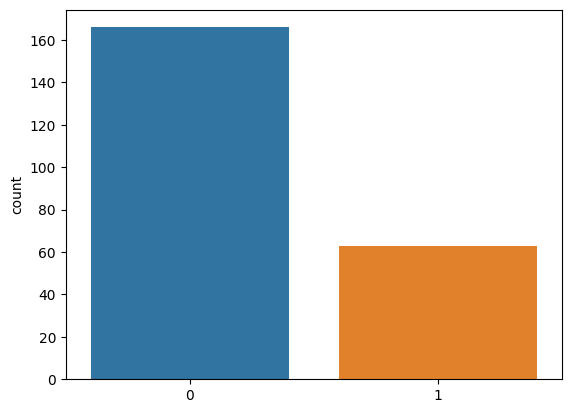

In [14]:
sns.countplot(x=y)

In [15]:
kf= KFold(3,shuffle=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[ 0.9017593 , -1.11056133, -0.76107578, ..., -0.40568682,
        -0.80889379, -0.26576626],
       [-0.35141782, -0.71914446, -0.84766893, ...,  0.58552343,
        -0.8222652 ,  0.84586672],
       [ 0.6304345 , -0.66460677, -0.68573858, ..., -0.51705695,
        -0.97774956, -0.50064216],
       ...,
       [-0.3820432 ,  0.37134553, -0.414454  , ...,  1.37649867,
        -1.02071123,  1.48418397],
       [-0.66709022, -0.66401659, -0.5469891 , ..., -0.64960475,
        -0.63325765, -0.61311819],
       [ 0.39070516, -0.16888515, -0.38506943, ..., -0.84068557,
        -0.43330339, -0.73635141]])

SVM

In [103]:
from sklearn.svm import SVC
svm = SVC()

In [104]:
scores_svm = cross_val_score(svm, X_scaled, y, cv=kf)

for i, score in enumerate(scores_svm, 1):
    print(f"Accuracy for Fold {i}: {score}")

accuracy_svm = scores_svm.mean()
print(f"Average Accuracy: {accuracy_svm}")

Accuracy for Fold 1: 0.8571428571428571
Accuracy for Fold 2: 0.881578947368421
Accuracy for Fold 3: 0.8157894736842105
Average Accuracy: 0.8515037593984962


In [105]:
y_pred_svm = cross_val_predict(svm, X_scaled, y, cv=kf)

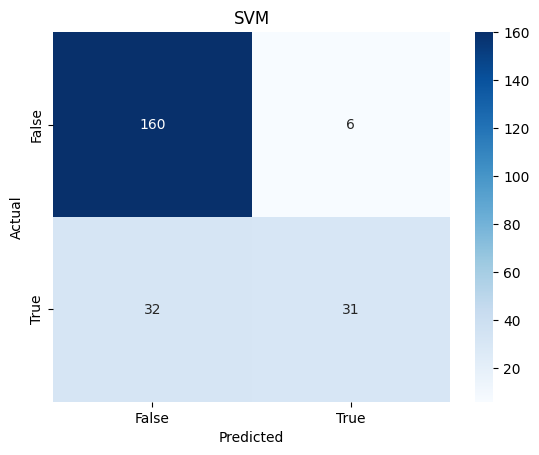

In [268]:
cm = confusion_matrix(y, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.title("SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [107]:
report = classification_report(y, y_pred_svm)
mcc=matthews_corrcoef(y, y_pred_svm)
print(report)
print("Matthews Correlation Coefficient:", mcc)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       166
           1       0.84      0.49      0.62        63

    accuracy                           0.83       229
   macro avg       0.84      0.73      0.76       229
weighted avg       0.83      0.83      0.82       229

Matthews Correlation Coefficient: 0.5531723341788128


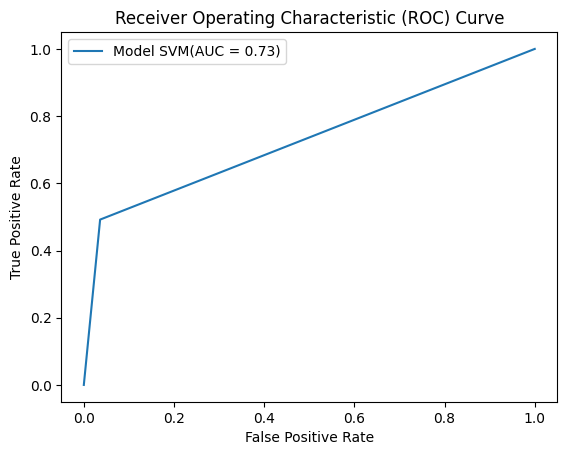

In [108]:
auc_model_svm = roc_auc_score(y, y_pred_svm)

false_positive_rate_svm, true_positive_rate_svm, _ = roc_curve(y, y_pred_svm)

plt.plot(false_positive_rate_svm, true_positive_rate_svm, label='Model SVM(AUC = {:.2f})'.format(auc_model_svm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest 

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [98]:
scores_rf = cross_val_score(rf, X_scaled, y, cv=kf)

for i, score in enumerate(scores_rf, 1):
    print(f"Accuracy for Fold {i}: {score}")
accuracy_rf = scores_rf.mean()
print(f"Average Accuracy: {accuracy_rf}")

Accuracy for Fold 1: 0.8311688311688312
Accuracy for Fold 2: 0.868421052631579
Accuracy for Fold 3: 0.7631578947368421
Average Accuracy: 0.820915926179084


In [99]:
y_pred_rf = cross_val_predict(rf, X_scaled, y, cv=kf)

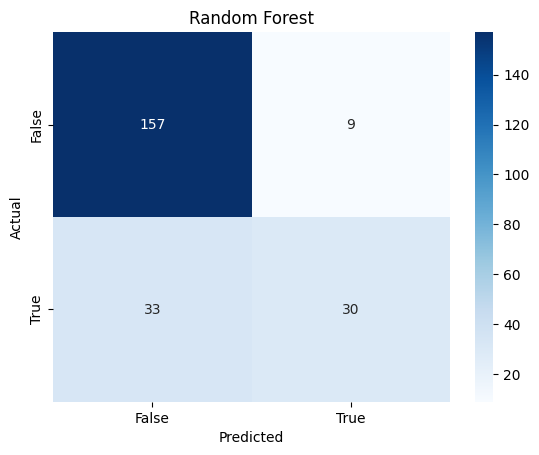

In [267]:
cm = confusion_matrix(y, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [101]:
report = classification_report(y, y_pred_rf)
mcc=matthews_corrcoef(y, y_pred_rf)
print(report)
print("Matthews Correlation Coefficient:", mcc)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       166
           1       0.77      0.48      0.59        63

    accuracy                           0.82       229
   macro avg       0.80      0.71      0.74       229
weighted avg       0.81      0.82      0.80       229

Matthews Correlation Coefficient: 0.5013032321236828


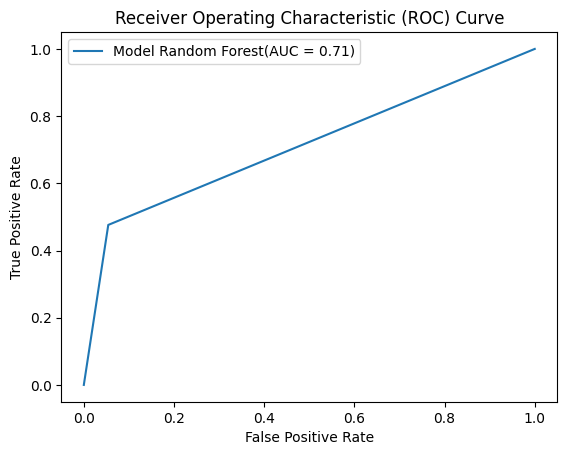

In [102]:
auc_model_rf = roc_auc_score(y, y_pred_rf)

false_positive_rate_rf, true_positive_rate_rf, _ = roc_curve(y, y_pred_rf)

plt.plot(false_positive_rate_rf, true_positive_rate_rf, label='Model Random Forest(AUC = {:.2f})'.format(auc_model_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

XGBoost

In [109]:
import xgboost as xgb
xgbm = xgb.XGBClassifier()

In [111]:
scores_xgb= cross_val_score(xgbm, X_scaled, y, cv=kf)

for i, score in enumerate(scores_xgb, 1):
    print(f"Accuracy for Fold {i}: {score}")
accuracy_xgb = scores_xgb.mean()
print(f"Average Accuracy: {accuracy_xgb}")

Accuracy for Fold 1: 0.8701298701298701
Accuracy for Fold 2: 0.8421052631578947
Accuracy for Fold 3: 0.7368421052631579
Average Accuracy: 0.8163590795169742


In [116]:
y_pred_xgb= cross_val_predict(xgbm, X_scaled, y, cv=kf)

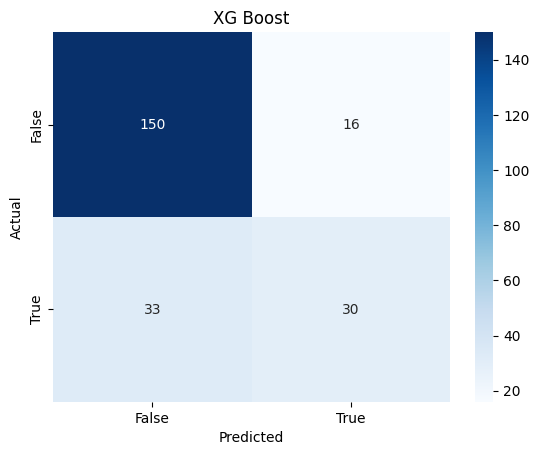

In [266]:
cm = confusion_matrix(y, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.title("XG Boost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [118]:
report = classification_report(y, y_pred_xgb)
mcc=matthews_corrcoef(y, y_pred_xgb)
print(report)
print("Matthews Correlation Coefficient:", mcc)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       166
           1       0.65      0.48      0.55        63

    accuracy                           0.79       229
   macro avg       0.74      0.69      0.71       229
weighted avg       0.77      0.79      0.77       229

Matthews Correlation Coefficient: 0.42333137809807825


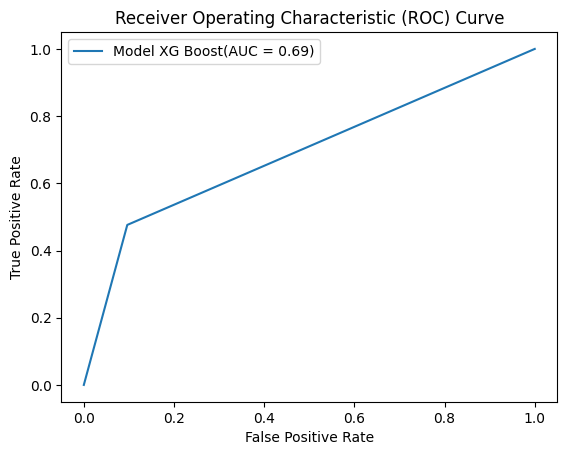

In [119]:
auc_model_xgbm= roc_auc_score(y, y_pred_xgb)

false_positive_rate_xgbm, true_positive_rate_xgbm, _ = roc_curve(y, y_pred_xgb)

plt.plot(false_positive_rate_xgbm, true_positive_rate_xgbm, label='Model XG Boost(AUC = {:.2f})'.format(auc_model_xgbm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Logistic Regression

In [232]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [253]:
scores_lr= cross_val_score(lr, X_scaled, y, cv=kf)

for i, score in enumerate(scores_lr, 1):
    print(f"Accuracy for Fold {i}: {score}")
accuracy_lr = scores_lr.mean()
print(f"Average Accuracy: {accuracy_lr}")

Accuracy for Fold 1: 0.8181818181818182
Accuracy for Fold 2: 0.8157894736842105
Accuracy for Fold 3: 0.7631578947368421
Average Accuracy: 0.799043062200957


In [254]:
y_pred_lr= cross_val_predict(lr, X_scaled, y, cv=kf)

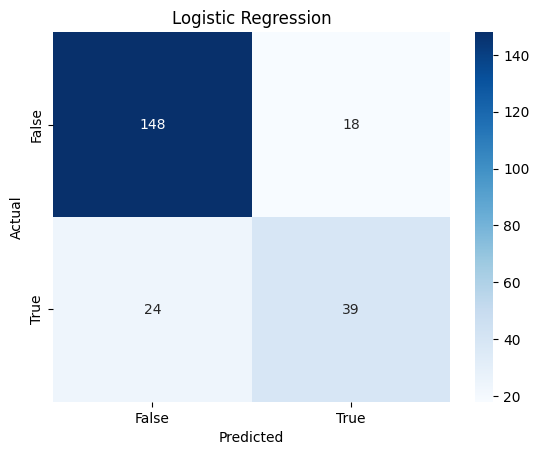

In [265]:
cm = confusion_matrix(y, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [256]:
report = classification_report(y, y_pred_lr)
mcc=matthews_corrcoef(y, y_pred_lr)
print(report)
print("Matthews Correlation Coefficient:", mcc)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       166
           1       0.68      0.62      0.65        63

    accuracy                           0.82       229
   macro avg       0.77      0.76      0.76       229
weighted avg       0.81      0.82      0.81       229

Matthews Correlation Coefficient: 0.5273698374426676


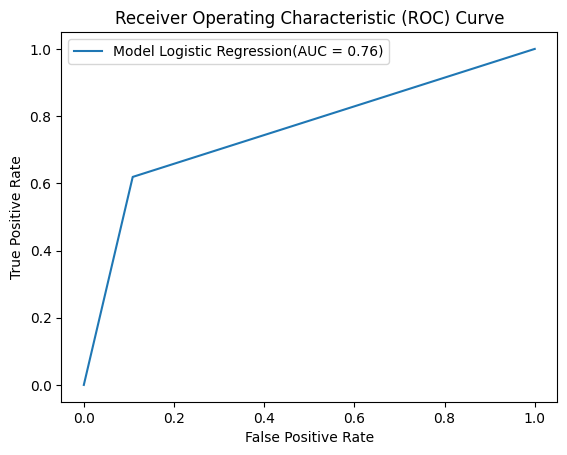

In [257]:
auc_model_lr= roc_auc_score(y, y_pred_lr)

false_positive_rate_lr, true_positive_rate_lr, _ = roc_curve(y, y_pred_lr)

plt.plot(false_positive_rate_lr, true_positive_rate_lr, label='Model Logistic Regression(AUC = {:.2f})'.format(auc_model_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

K Nearest Neighbour

In [259]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 

In [260]:
scores_knn= cross_val_score(knn, X_scaled, y, cv=kf)

for i, score in enumerate(scores_knn, 1):
    print(f"Accuracy for Fold {i}: {score}")
accuracy_knn = scores_knn.mean()
print(f"Average Accuracy: {accuracy_knn}")

Accuracy for Fold 1: 0.8181818181818182
Accuracy for Fold 2: 0.7631578947368421
Accuracy for Fold 3: 0.8421052631578947
Average Accuracy: 0.8078149920255183


In [261]:
y_pred_knn= cross_val_predict(knn, X_scaled, y, cv=kf)

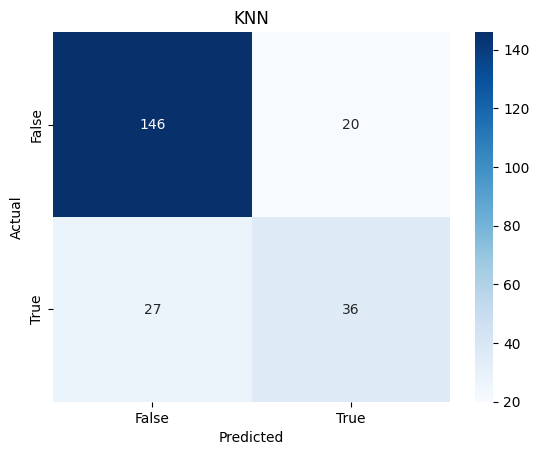

In [262]:
cm = confusion_matrix(y, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.title("KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [263]:
report = classification_report(y, y_pred_knn)
mcc=matthews_corrcoef(y, y_pred_knn)
print(report)
print("Matthews Correlation Coefficient:", mcc)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       166
           1       0.64      0.57      0.61        63

    accuracy                           0.79       229
   macro avg       0.74      0.73      0.73       229
weighted avg       0.79      0.79      0.79       229

Matthews Correlation Coefficient: 0.46852461515426336


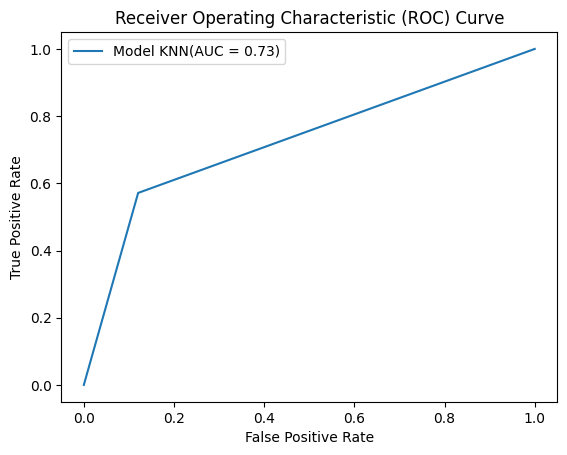

In [264]:
auc_model_knn= roc_auc_score(y, y_pred_knn)

false_positive_rate_knn, true_positive_rate_knn, _ = roc_curve(y, y_pred_knn)

plt.plot(false_positive_rate_knn, true_positive_rate_knn, label='Model KNN(AUC = {:.2f})'.format(auc_model_knn))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Multi-Layer Perceptron

In [316]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50, 25), activation='relu', random_state=42)

In [318]:
scores_mlp= cross_val_score(mlp, X_scaled, y, cv=kf)

for i, score in enumerate(scores_mlp, 1):
    print(f"Accuracy for Fold {i}: {score}")
accuracy_mlp = scores_mlp.mean()
print(f"Average Accuracy: {accuracy_mlp}")

Accuracy for Fold 1: 0.8571428571428571
Accuracy for Fold 2: 0.8552631578947368
Accuracy for Fold 3: 0.7894736842105263
Average Accuracy: 0.8339598997493735


In [323]:
y_pred_mlp= cross_val_predict(mlp, X_scaled, y, cv=kf)

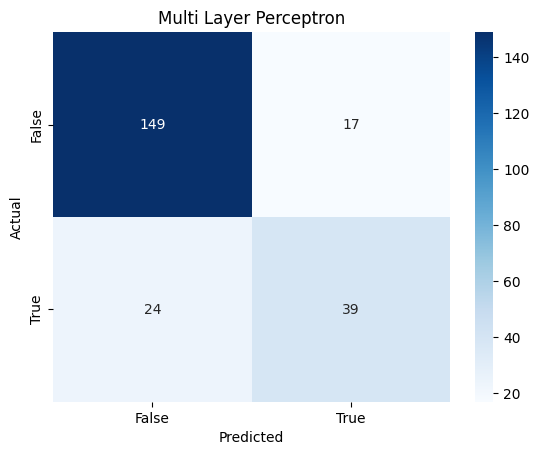

In [324]:
cm = confusion_matrix(y, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.title("Multi Layer Perceptron")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [326]:
report = classification_report(y, y_pred_mlp)
mcc=matthews_corrcoef(y, y_pred_mlp)
print(report)
print("Matthews Correlation Coefficient:", mcc)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       166
           1       0.70      0.62      0.66        63

    accuracy                           0.82       229
   macro avg       0.78      0.76      0.77       229
weighted avg       0.82      0.82      0.82       229

Matthews Correlation Coefficient: 0.5367766106188475


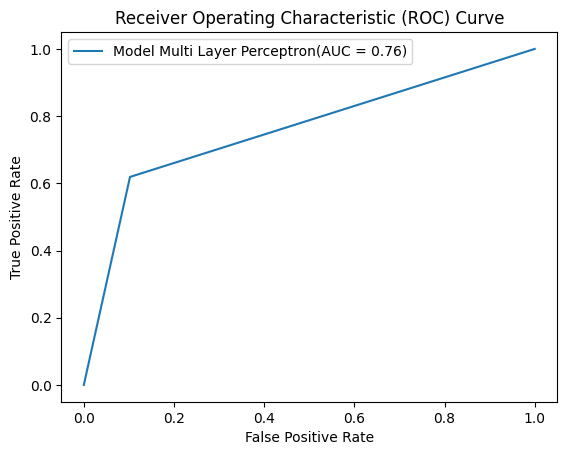

In [325]:
auc_model_mlp= roc_auc_score(y, y_pred_mlp)

false_positive_rate_mlp, true_positive_rate_mlp, _ = roc_curve(y, y_pred_mlp)

plt.plot(false_positive_rate_mlp, true_positive_rate_mlp, label='Model Multi Layer Perceptron(AUC = {:.2f})'.format(auc_model_mlp))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()